In [76]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [77]:
df = pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")
df1= pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")
df2 = pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")
df3 = pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [78]:
#visualising the dataset


In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categ = ['gender','ever_married','work_type','Residence_type','smoking_status']
 
df[categ] = df[categ].apply(le.fit_transform)
# df1['class'] = encod.fit_transform(df1['class'])

df
 


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [80]:
for i in df.columns:
  print (df[i].dtype)


int64
int64
float64
int64
int64
int64
int64
int64
float64
float64
int64
int64


In [81]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [82]:

df = df.dropna()
df= df.drop('id',axis=1)

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [83]:
df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [84]:
categ = ['gender','ever_married','work_type','Residence_type','smoking_status']
 
df1[categ] = df1[categ].apply(le.fit_transform)
# df1['class'] = encod.fit_transform(df1['class'])
df2[categ] = df2[categ].apply(le.fit_transform)

df3[categ] = df3[categ].apply(le.fit_transform)


df1
 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [85]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.410063,42.865374,0.091872,0.049501,0.652679,2.170096,0.507232,105.305150,28.893237,1.375433,0.042575
std,0.492309,22.555115,0.288875,0.216934,0.476167,1.092593,0.499999,44.424341,7.854067,1.067322,0.201917
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.070000,23.500000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.680000,28.100000,2.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,113.570000,33.100000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [86]:
df1 = df1.dropna()

df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [87]:
from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=4)
# df2['bmi']= imputer.fit_transform(df[['bmi']])
# # df2.isna().sum()
# df2.drop('id',axis=1,inplace=True)

In [88]:
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [89]:
df3=df3.dropna()
df3.drop('id',axis=1,inplace = True)
df3


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [90]:
from sklearn.model_selection import train_test_split

In [91]:
#df = normal with ffill and with id
# df1 is with all nan drop without id
#df2 is with without id anf ffill

x = df.drop('stroke',axis=1)
y = df['stroke']
x1 = df1.drop('stroke',axis=1)
y1 = df1['stroke']

x2 = df2.drop('stroke',axis=1)
y2= df2['stroke']

x3 = df3.drop('stroke',axis=1)
y3= df3['stroke']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.2,random_state=20)
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.2,random_state=20)
x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y3,test_size=0.2,random_state=20)

In [92]:
# I will do everything for df only then i will copy the celll and do  copy past for df1 and df2 too and compare if there is any difference.

# The models i am goinf to train here are Decision Tree, logistic regressor, KNN, SVC, Random Forest

In [170]:
# First we using Descision tree classifier
from sklearn.tree import DecisionTreeClassifier as dtc
model1 = dtc()

In [171]:
model1.fit(x_train,y_train)


DecisionTreeClassifier()

In [95]:
y_pred = model1.predict(x_test)

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       937
           1       0.08      0.09      0.09        45

    accuracy                           0.91       982
   macro avg       0.52      0.52      0.52       982
weighted avg       0.92      0.91      0.91       982



In [172]:
model1.score(x_test,y_test)

0.9134419551934827

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


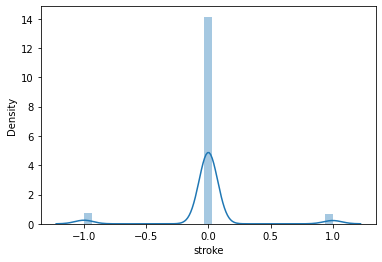

In [98]:
import seaborn as sns
sns.distplot(y_test-y_pred)

In [99]:
model1.fit(x_train1,y_train1)

DecisionTreeClassifier()

In [100]:
model1.score(x_test1,y_test1)

0.9195519348268839

In [101]:
# model1.fit(x_train2,y_train2)
# model1.score(x_test2,y_test2)

In [102]:
model1.fit(x_train3,y_train3)
model1.score(x_test3,y_test3)

0.9164969450101833

In [103]:
#model2 = logistic regressor
from sklearn.linear_model import LogisticRegression

In [167]:
model2 = LogisticRegression()

In [168]:
model2.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [169]:
model2.score(x_test,y_test)

0.9531568228105907

In [107]:
y_pred2 = model1.predict(x_test)
# from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       937
           1       0.09      0.09      0.09        45

    accuracy                           0.92       982
   macro avg       0.52      0.52      0.52       982
weighted avg       0.92      0.92      0.92       982



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


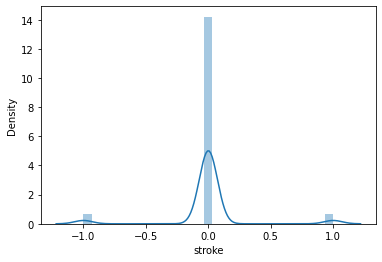

In [108]:
import seaborn as sns
sns.distplot(y_test-y_pred2)

In [109]:
# model 3 = knn


In [158]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [159]:
model3 = knn() 

In [160]:
model3.fit(x_train,y_train)
model3.score(x_test,y_test)

0.9521384928716904

In [113]:
y_pred3 = model3.predict(x_test)

In [114]:
print(classification_report(y_test,y_pred3))


              precision    recall  f1-score   support

           0       0.95      1.00      0.98       937
           1       0.00      0.00      0.00        45

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.95      0.93       982



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


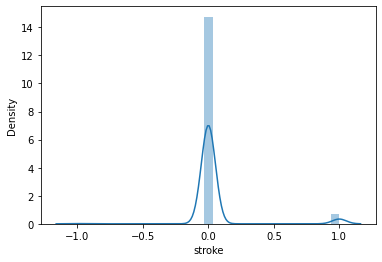

In [115]:
import seaborn as sns
sns.distplot(y_test-y_pred3)

In [148]:
#model4 svc
from sklearn.svm import SVC
model4 = SVC(probability=True)


In [152]:
model4.fit(x_train,y_train)
model4.score(x_test,y_test)

0.9541751527494908

In [118]:
y_pred4= model4.predict(x_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       937
           1       0.00      0.00      0.00        45

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.95      0.93       982



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


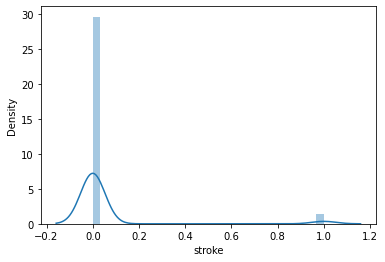

In [119]:
import seaborn as sns
sns.distplot(y_test-y_pred4)

In [120]:
# model5 - Random Forest CLassifier
from sklearn.ensemble import RandomForestClassifier as rfc
model5 = rfc()

In [121]:
model5.fit(x_train,y_train)
model5.score(x_test,y_test)

0.9541751527494908

In [122]:
y_pred5 = model5.predict(x_test)
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       937
           1       0.00      0.00      0.00        45

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.95      0.93       982



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


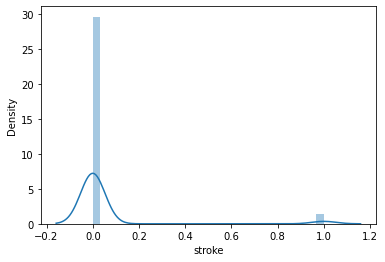

In [123]:
import seaborn as sns
sns.distplot(y_test-y_pred5)

In [124]:
#plotinng ROC curve
y_prob5 = model5.predict_proba(x_test)
y_prob5 = y_prob5[:,1]
auc5 = roc_auc_score(y_test,y_prob5)
print("Roc score for model 5 is ",auc5)

fpr5,tpr5,thresh = roc_curve(y_test,y_prob5)


Roc score for model 5 is  0.7651013874066168


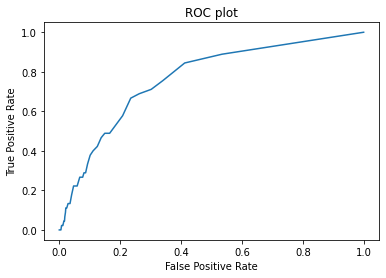

In [125]:
plt.plot(fpr5,tpr5 , label = 'model5 AUCROC = %0.3f' %auc5)
plt.title('ROC plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [163]:
y_prob4 = model4.predict_proba(x_test)
y_prob4 = y_prob4[:,1]
auc4 = roc_auc_score(y_test,y_prob4)
print("Roc score for model 4 is ",auc4)

fpr4,tpr4,thresh = roc_curve(y_test,y_prob4)


Roc score for model 4 is  0.7247242974030594


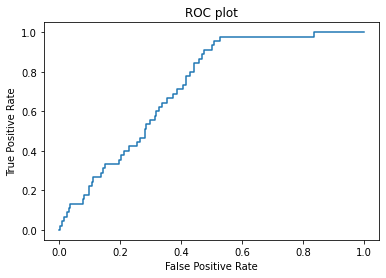

In [174]:
plt.plot(fpr4,tpr4 , label = 'model4 AUCROC = %0.3f' %auc4)
plt.title('ROC plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [164]:
y_prob3 = model3.predict_proba(x_test)
y_prob3 = y_prob3[:,1]
auc3 = roc_auc_score(y_test,y_prob3)
print("Roc score for model 3 is ",auc3)

fpr3,tpr3,thresh = roc_curve(y_test,y_prob3)

Roc score for model 3 is  0.6511917467093561


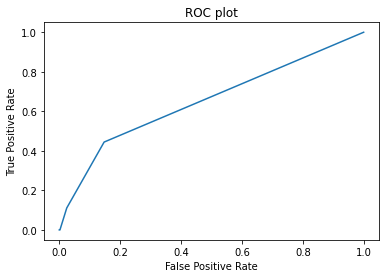

In [165]:
plt.plot(fpr3,tpr3 , label = 'model3 AUCROC = %0.3f' %auc3)
plt.title('ROC plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc score for model 2 is  0.8180718605478478


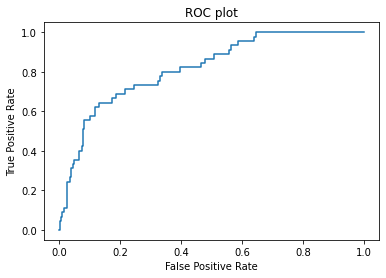

In [173]:
y_prob2 = model2.predict_proba(x_test)
y_prob2 = y_prob2[:,1]
auc2 = roc_auc_score(y_test,y_prob2)
print("Roc score for model 2 is ",auc2)

fpr2,tpr2,thresh = roc_curve(y_test,y_prob2)

plt.plot(fpr2,tpr2 , label = 'model2 AUCROC = %0.3f' %auc2)
plt.title('ROC plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc score for model 1 is  0.5103877623621487


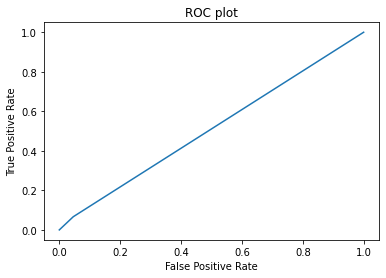

In [176]:
y_prob1 = model1.predict_proba(x_test)
y_prob1 = y_prob1[:,1]
auc1 = roc_auc_score(y_test,y_prob1)
print("Roc score for model 1 is ",auc1)

fpr1,tpr1,thresh = roc_curve(y_test,y_prob1)

plt.plot(fpr1,tpr1 , label = 'model1 AUCROC = %0.3f' %auc1)
plt.title('ROC plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [126]:
#Dimensionality Reduction
# PCA, LDA and SFS


In [127]:
#1 - PCA 
from sklearn.decomposition  import PCA
pca = PCA(n_components= 5)
pca.fit(x)


PCA(n_components=5)

In [128]:
x_pca = pca.transform(x)
x_pca_t, x_pca_te = train_test_split(x_pca,test_size = 0.2)

In [129]:
model5.fit(x_pca_t,y_train)
model5.score(x_pca_te,y_test)

0.9541751527494908

In [137]:
model4.fit(x_pca_t,y_train)
model4.score(x_pca_te,y_test)

0.9541751527494908

In [140]:
model3.fit(x_pca_t,y_train)
model3.score(x_pca_te,y_test)

0.9531568228105907

In [141]:
model2.fit(x_pca_t,y_train)
model2.score(x_pca_te,y_test)

0.9541751527494908

In [142]:
model1.fit(x_pca_t,y_train)
model1.score(x_pca_te,y_test)

0.9114052953156823

In [130]:
# 2- LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components= 1)
x_lda = lda.fit_transform(x_train,y_train)
x_lda_t = lda.fit_transform(x_test,y_test)


In [131]:
model4.fit(x_lda,y_train)
model4.score(x_lda_t,y_test)

0.9541751527494908

In [59]:
#Hyper paramaeter tuning 

In [ ]:
#model1 - Decision tree classifier
param_dist = {
    'max_depth' : [1,2,3,4,5,6,7,8,9],
    'criterion' : ["gini","entropy"],
    'min_samples_split' : [1,2,3,4,5,6,7,9],
    'max_features' : ['auto','sqrt','log2'],
    'min_samples_leaf' : [1,2,3,4,5,6,7,8,0]


}

grid = GridSearchCV(model1,param_grid= param_dist,cv = 10, n_jobs = -1)
grid.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
8640 fits failed out of a total of 38880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4320 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a 

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 0],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 9]})

In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [132]:
model1__ = dtc(criterion = 'gini', max_depth = 4,max_features = 'sqrt',min_samples_leaf = 1, min_samples_split= 7)
model1__.fit(x_train,y_train)
model1__.score(x_test,y_test)

0.955193482688391

In [177]:
y_pred_dt = model1__.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       937
           1       1.00      0.02      0.04        45

    accuracy                           0.96       982
   macro avg       0.98      0.51      0.51       982
weighted avg       0.96      0.96      0.93       982



In [ ]:
# hyparameter tuning model2 
param_dist = {
   'penalty' : ['l1','l2','none','elasticnet'],
   'dual': [True,False],
   'C' : [0.5,0.7,1,1.5,2,3,4,5],
   'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']


}

grid1 = GridSearchCV(model2,param_grid= param_dist,cv = 10, n_jobs = -1)
grid1.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2240 fits failed out of a total of 3200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.5, 0.7, 1, 1.5, 2, 3, 4, 5],
                         'dual': [True, False],
                         'penalty': ['l1', 'l2', 'none', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [ ]:
grid1.best_params_

{'C': 0.5, 'dual': False, 'penalty': 'l2', 'solver': 'newton-cg'}

In [151]:
#implementing in model

model2__ = LogisticRegression( C= 0.5, dual= False, penalty='l2', solver =  'newton-cg')
model2__.fit(x_train,y_train)
model2__.score(x_test,y_test)

0.9541751527494908

In [178]:
y_pred_dt = model2__.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       937
           1       0.00      0.00      0.00        45

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.95      0.93       982



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
#hyperparameter tuning of model3
param_dist = {
   'n_neighbors' : [2,4,6,8,10],
   'weights': ['uniform', 'distance'],
   'algorithm' : ['auto','ball_tree','kd_tree','brute'],
   'leaf_size' : [10,20,30,50,70]
   



}

grid2 = GridSearchCV(model3,param_grid= param_dist,cv = 10, n_jobs = -1)
grid2.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 50, 70],
                         'n_neighbors': [2, 4, 6, 8, 10],
                         'weights': ['uniform', 'distance']})

In [63]:
grid2.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 10, 'weights': 'uniform'}

In [150]:
# creating the model and finding the accuracy
from sklearn.neighbors import KNeighborsClassifier as knn
model3__ = knn(algorithm = 'auto', leaf_size =  10, n_neighbors = 10, weights = 'uniform') 
model3__.fit(x_train,y_train)
model3__.score(x_test,y_test)

0.9541751527494908

In [179]:
y_pred_dt = model3__.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       937
           1       0.00      0.00      0.00        45

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.95      0.93       982



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
# hypertuning model 4 that is SVC
param_dist = {
    'C' : [0.5,1,1.5,2,3,5],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'gamma' : ['scale','auto'],
    'shrinking' : [True,False]
    
   


}

grid3 = GridSearchCV(model4,param_grid= param_dist,cv = 10, n_jobs = -1)
grid3.fit(x_train,y_train)


KeyboardInterrupt: ignored

In [ ]:
grid3.best_params_

In [ ]:
# creating hypertuned model model4


In [ ]:
 # now hypertunoing model 5 that is Random forest
 param_dist = {
     'n_estimators' : [100,200,400,600,800],
    
     
     'min_samples_split' : [2,3,5,7,9,11],
     
     'max_features' : ['auto','sqrt','log2'],
    
     
    
   


}

grid4 = GridSearchCV(model5,param_grid= param_dist,cv = 10, n_jobs = -1)
grid4.fit(x_train,y_train)

grid4.best_params_

In [149]:
# training the model with tuned hyperparameters
from sklearn.ensemble import RandomForestClassifier as rfc
model5__ = rfc(max_features='sqrt', min_samples_split= 11, n_estimators = 100)
model5__.fit(x_train,y_train)
model5__.score(x_test,y_test)

0.9541751527494908

In [180]:
y_pred_dt = model5__.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       937
           1       0.00      0.00      0.00        45

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.95      0.93       982



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
